In [1]:
!pip install numpy
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from pyHYLC.fitting import datautils, plotutils, fitting

### read & fit data

In [16]:
# READ AND NORMALIZE DATA
data_folder = os.path.join("..","data", 
#                            "basket"
#                            "cartridge_belt_rib"
 #                           "satin"
#                            "satin_small"
 #                          "slip_stitch_honeycomb"
#                            "stockinette"
 #                           "stockinette_small"
                            "minor_project_data"
                          ) 
X, Y, normX_scale, area_density = datautils.read(data_folder)

# PREPARE INDICES/SLICES
n_per_1D = 150    # for 1D functions have 150 samples
n_per_2D = 50*50  # for 2D functions have 50x50 samples
ixs_1D = [0, 1, 2, 3, 5] # order of sampled strain coordinates for 1D
ixs_2D = [[0,1],[0,2],[0,3],[0,5], [1,2],[1,3],[1,5], [2,3],[2,5]] # order of sampled strain coordinates for 2D
blocks_1D = [slice(i*n_per_1D,(i+1)*n_per_1D) for i in range(len(ixs_1D))]
blocks_2D = [slice(n_per_1D*len(ixs_1D) + i*n_per_2D, n_per_1D*5 + (i+1)*n_per_2D) for i in range(len(ixs_2D))]

# FIT SPLINE COEFFICIENTS
stockinette = "stock" in data_folder # special treatment for stockinette
coeffs = fitting.fit(X, Y, ixs_1D, blocks_1D, ixs_2D, blocks_2D, stockinette=stockinette)
coeffs_funs = fitting.coeffs_to_splines(coeffs, ixs_1D, ixs_2D)

### plot 1D

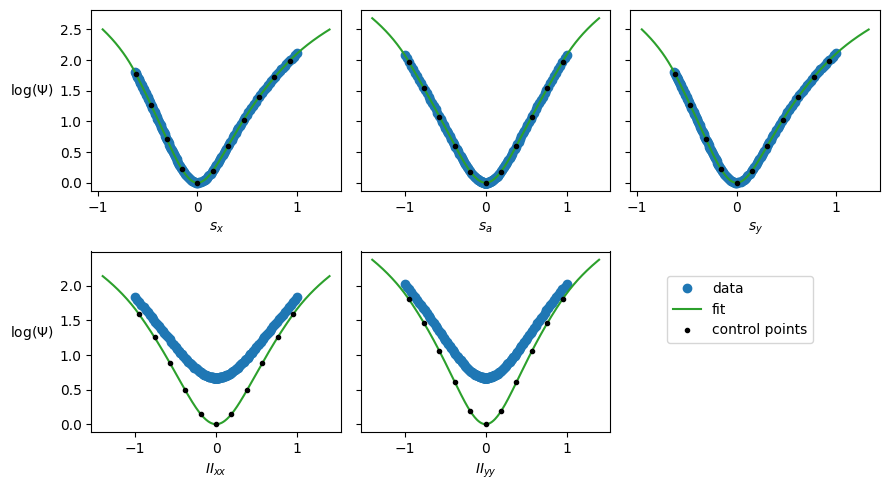

In [17]:
fig, axs = plt.subplots(2,3,figsize=(9,5), sharey='row')
fig.delaxes(axs[-1,-1])
for i in range(3):
    plotutils.plot1D(coeffs_funs, X[blocks_1D[i]], Y[blocks_1D[i]], i, ixs_1D[i],
                  ax=axs[0,i], p_extend=0.2, ylabels=i==0, log=True)
for i in range(3,5):
    plotutils.plot1D(coeffs_funs, X[blocks_1D[i]], Y[blocks_1D[i]], i, ixs_1D[i],
                  ax=axs[1,i-3], p_extend=0.2, ylabels=i==3, log=True)
plt.tight_layout()
handles, labels = axs[0,2].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.75,0.3));

### plot 2D

In [ ]:
for i in range(len(blocks_2D)):
    plotutils.plot2D(coeffs_funs,
                     X[blocks_2D[i]], Y[blocks_2D[i]], i, ixs_2D[i], int(np.sqrt(n_per_2D)+0.5),
                     figax=None, n_tst=50, p_extend=0.1, log=True,
                     cmap="Spectral_r", cmaperr=plotutils.cmaperr, shading='gouraud')

### save fit

In [18]:
filename = "fit.json"
mat = datautils.material_dict(filename, area_density, ixs_2D, coeffs, normX_scale)